# 3.2. Métricas de Avaliação para Classificadores
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

### Roteiro da Aula

1. Métricas de Avaliação  
    a. Acurácia  
    b. Matriz de Confusão  
        - Precisão  
        - Sensibilidade (Recall)  
        - Especificidade  
    c. ROC    
        - Curve  
        - Score/Gini  

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.linear_model import LogisticRegression

sns.set()
pio.templates.default = 'plotly_dark'

In [26]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv')

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#### Primeiro modelo: considerando apenas o `Fare`

In [29]:
X1 = df[['Fare']]
y1 = df['Survived']

In [30]:
clf1 = LogisticRegression().fit(X1, y1)

In [31]:
y_pred1 = clf1.predict(X1)
y_proba1 = clf1.predict_proba(X1)[:,1]

#### Segundo modelo: considerando o `Fare` e o `Age`

In [32]:
X2 = df[['Fare', 'Age']]
y2 = df['Survived']

In [33]:
clf2 = LogisticRegression().fit(X2, y2)

In [34]:
y_pred2 = clf2.predict(X2)
y_proba2 = clf2.predict_proba(X2)[:,1]

#### Terceiro modelo: considerando `Fare`, `Age` e `Sex`

In [35]:
df['Sex'] = df['Sex'].replace({
  'male': 0,
  'female': 1
})

In [36]:
X3 = df[['Fare', 'Age', 'Sex']]
y3 = df['Survived']

In [37]:
clf3 = LogisticRegression().fit(X3, y3)

In [38]:
y_pred3 = clf3.predict(X3)
y_proba3 = clf3.predict_proba(X3)[:,1]

In [39]:
y_proba3[:5]

array([0.16802739, 0.78991545, 0.66854371, 0.75791815, 0.15207165])

## Métricas de Avaliação de Modelos

**O modelo melhorou ao utilizar mais variáveis?**

### Acurácia

Também conhecida como taxa de acerto, essa medida de desempenho traz a proporção de acertos sobre o total de observações. Assumindo que, dado um conjunto de variáveis explicativas $x$ associados a um conjunto de variável resposta $y$ um modelo $M$ foi treinado, temos que a acurácia do modelo $M$ ($ac(M)$) pode ser descrita matematicamente como:

$$ac({M}) = \frac{1}{n}\sum_{i = 1}^{n}{I(y_{i} = M(x_i)) }$$

A taxa de acerto é um número limitado entre 0 e 1. Quanto maior for o seu valor, melhor é o modelo $M$.

De forma similar, podemos obter a taxa de erro com:

$$err({M}) = 1 - ac(M)$$

Nesse caso, quanto menor a taxa de erro, melhor o modelo $M$.


**Como calcular a acurácia do clf1 e do clf2?**

In [40]:
# clf1
(y1 == y_pred1).sum() / X1.shape[0]

0.6655443322109988

In [41]:
# clf2
(y2 == y_pred2).sum() / X2.shape[0]

0.6554433221099888

In [42]:
# clf3
(y3 == y_pred3).sum() / X3.shape[0]

0.7833894500561167

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y1, y_pred1)

0.6655443322109988

In [45]:
accuracy_score(y2, y_pred2)

0.6554433221099888

In [46]:
accuracy_score(y3, y_pred3)

0.7833894500561167

**Para pensar:** Faça um modelo usando `'Pclass', 'Sex', 'SibSp', 'Fare'`, um segundo modelo sem o `'Fare'` e os compare. O que acontece?

### Matriz de Confusão

Uma alternativa para visualizar o desempenho de um modelo é analisar sua matriz de confusão, a qual ilustra o número de predições corretas e incorretas para cada classe do modelo. As linhas dessa matriz representam as classes verdadeiras, enquanto as colunas representam as classes preditas pelo modelo. Logo, casa elemento $m_{ij}$ de uma matriz de confusão $M_{MC}$ apresenta o número de exemplos da classe $i$ classificados como classe $j$. Dessa forma, os elementos na diagonal principal indicam as classificações feitas de forma correta, enquanto os outros elementos são os classificados de forma incorreta.

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

No Sklearn, a notação muda um pouco:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Por meio dela, temos as medidas quantitativas de quais classes possuem maior dificuldade de serem corretamente classificadas, se existe alguma "confusão" recorrente entre duas classes e mais uma série de medidas quantitativas sobre o modelo (a ser visto mais adiante).

In [47]:
'''
[
  [10, 0]
  [5, 10]
]
'''

'\n[\n  [10, 0]\n  [5, 10]\n]\n'

In [48]:
'''[
  [10, 5]
  [0, 10]
]'''

'[\n  [10, 5]\n  [0, 10]\n]'

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
confusion_matrix(y1, y_pred1)

array([[511,  38],
       [260,  82]])

In [51]:
confusion_matrix(y2, y_pred2)

array([[506,  43],
       [264,  78]])

In [52]:
confusion_matrix(y3, y_pred3)

array([[462,  87],
       [106, 236]])

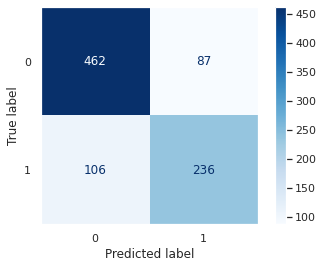

In [53]:
cm3 = confusion_matrix(y3, y_pred3)
cm3_display = ConfusionMatrixDisplay(cm3)

cm3_display.plot(cmap='Blues')
plt.grid(False)

### Medidas de Desempenho Derivadas da Matriz de Confusão

Dado a matriz de confusão mostranda no item anterior, podemos extrair, entre outras, as seguintes medidas de desempenho.

#### Precisão (precision)

É a proporção de exemplos positivos classificados corretamente entre todos aqueles preditos como positivos pelo modelo $M$.

$$prec(M) = \frac{\textrm{VP}}{\textrm{VP + FP}}$$

Pode ser vista como uma medida de exatidão do modelo. Uma precisão de 1 para uma determinada classe $C_1$ significa que cada item predito como pertencene a essa classe de fato pertence ela; porém, não nos trás informações sobre as predições das classes $C_2$.

#### Sensibilidade (recall, TVP)

Taxa de acerto na classe positiva, também conhecida como revocação ou taxa de verdadeiros positivos (TVP).

$$sens(M) = \frac{\textrm{VP}}{\textrm{VP + FN}}$$


$$\textrm{TVP}(M) = sens(M)$$

Pode ser vista como uma medida de completude do modelo. Uma sensibilidade de 1 para uma determinada classe $C_1$ significa que todos os itens que deveriam ser previstos como tal, de fato foram; mas não nos trás informações sobre as outras predições erradas dentro da própria classes $C_1$.

![](Quadros/2-precision-recall.png)

In [54]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [55]:
confusion_matrix(y1, y_pred1)

array([[511,  38],
       [260,  82]])

In [56]:
print('Precisão:', precision_score(y1, y_pred1))
print('Sensibilidade:', recall_score(y1, y_pred1))

Precisão: 0.6833333333333333
Sensibilidade: 0.23976608187134502


In [57]:
confusion_matrix(y3, y_pred3)

array([[462,  87],
       [106, 236]])

In [58]:
print('Precisão:', precision_score(y3, y_pred3))
print('Sensibilidade:', recall_score(y3, y_pred3))

Precisão: 0.7306501547987616
Sensibilidade: 0.6900584795321637


In [59]:
print(classification_report(y1, y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       549
           1       0.68      0.24      0.35       342

    accuracy                           0.67       891
   macro avg       0.67      0.59      0.56       891
weighted avg       0.67      0.67      0.61       891



#### F1-score

$$
f_1\textrm{-score} = \frac{2 \times (precisao \times sensibilidade)}{precisao + sensibilidade}
$$

In [60]:
media_aritmetica = lambda a, b: (a + b) / 2

In [61]:
media_harmonica = lambda a, b: (2 * a * b) / (a + b)

In [62]:
media_aritmetica(0.7, 0.7)

0.7

In [63]:
media_harmonica(0.7, 0.7)

0.7

In [64]:
media_aritmetica(1, 0.4)

0.7

In [65]:
media_harmonica(1, 0.4)

0.5714285714285715

#### Especificidade

Taxa de acerto na classe negativa, sendo o complementar a taxa de falsos positivos (TFP).

$$esp(M) = \frac{\textrm{VN}}{\textrm{VN + FP}}$$


$$\textrm{TFP}(M) = 1 - esp(M) = \frac{\textrm{FP}}{\textrm{VN + FP}}$$

### ROC AUC

Uma forma alternativa e comum de avaliar classificadores em problemas binários é por meio do uso das curvas ROC (*Receiving Operating Characteristics*). Seu gráfico é bidimensional, no qual o eixo X está a TFP e no Y a TVP. Na próxima figura, temos um exemplo desse tipo de análise. Se um modelo se encontra na diagonal, dizemos que ele possui comportamento similar ao lançamento de uma moeda não viciada. Modelos abaixo dessa linha são piores que o aleatório, enquanto que acima são modelos melhores que o aleatório. Se um modelo está na ponta superior esquerda, chamada de céu ROC, dizemos que é um modelo perfeito; se está na ponta superior direita ou inferior esqueda, o modelo sempre classificará novos itens como positivos ou negativos, respectivamente; se está na ponta inferior direita, chamada de inferno ROC, esse modelo estará sempre errando. Um fator importante de ser notado é que se um modelo de classificação binária está *sempre* errado, basta invertermos sua predição para que seu desempenho perfeito.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/f6554123-1ee9-4838-8105-e0e32ab4c412.png" style="width: 300px;"/></center>

Apesar dessa análise gerar uma boa visualização para comparação de diferentes modelos, o processO mais usual é gerar uma curva ROC. Tomemos o seguinte exempplo: apesar da variável resposta ser binária em uma Regressão Logística, sua resposta é dado em um valor *contínuo* entre 0 e 1, que depois é aplicado um limiar de corte para definir se aquele caso pertence a classe positiva ou negativa; logo, temos um valor de TVP e TFP para cada ponto limiar, gerando assim uma curva para cada modelo de classificação, no formato das curvas na próxima figura.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/f1b7f22d-1f3b-460c-b53f-7f605e5d1bc9.png" style="width: 300px;"/></center>

Quando não há interseções entre as curvas de dois modelos, signica que o modelo que possui sua curva mais próxima do céu ROC é o que oferece melhor desempenho. Ao existir cruzamentos, cada um terá um desempenho melhor que o outro de acordo com a região. Entrentao, o mais comum é trazer a **área abaixo da curva ROC (AUC-ROC)** para cada modelo e compará-los com essa medida única, que é compreendida enre 0 e 1. Valores próximos de 1 são considerados os melhores; valores próximos a 0,5 são considerados aleatórios.

**A ROC AUC (*Area Under the Curve*) representa o grau ou medida de separabilidade. Diz o quanto o modelo é capaz de distinguir entre as classes. Quanto maior a AUC, melhor será o modelo em prever a classe 0 como sendo 0, e a classe 1 como sendo 1. Por analogia, quanto maior a AUC, melhor será a capacidade do modelo de distinguir entre transações fraudulentas e não fraudulentas.**

- Qual seria o valor ideal para a ROC AUC?

|   Valor do Score ROC AUR  | Poder de Classificação |
|:----------------:|:----------------------:|
|        $0.5$       |         Não há         |
| $0.7 \leq AUR < 0.8$ |        Aceitável       |
| $0.8 \leq AUR < 0.9$ |        Muito bom       |
|      $ \geq 0.9$      |        Excelente       |

Fonte: [Tese sobre Detecção de Fraude - Página 86](https://www.teses.usp.br/teses/disponiveis/45/45134/tde-01022016-204144/publico/Paulo_Oliveira_Mestrado_PPGCC.pdf)

![](Quadros/3-roc-curve.png)

### Gini

$$
  \textrm{Gini} = (2\times AUC) - 1
$$

- Para um modelo aleatório, $AUC = 0.5$, portanto, $\textrm{Gini} = 0$.
- Para um modelo aleatório, $AUC = 1$, portanto, $\textrm{Gini} = 1$.
- Para um modelo aleatório, $AUC = 0$, portanto, $\textrm{Gini} = -1$.

---

#### Entendendo o método `where` no Numpy

In [72]:
arr = np.array([1, 2, 3, 4, 5])

In [73]:
np.where(arr > 3, 1, 0)

array([0, 0, 0, 1, 1])

---

In [79]:
limiar = 0.8

y_predito = np.where(y_proba3 > limiar, 1, 0)

In [80]:
confusion_matrix(y3, y_predito)

array([[543,   6],
       [284,  58]])

In [78]:
confusion_matrix(y3, y_pred3)

array([[462,  87],
       [106, 236]])

In [82]:
def calc_tvp_tfp(y, y_proba, limiar=0.5):
  y_predito = np.where(y_proba > limiar, 1, 0)

  cm = confusion_matrix(y, y_predito)

  [vn, fp] = cm[0] # Na primeira da CM, eu tenho VN e FP
  [fn, vp] = cm[1] # Na segunda da CM, eu tenho FN e VP

  TVP = vp / (vp + fn)
  TFP = fp / (fp + vn)

  return TFP, TVP

In [83]:
calc_tvp_tfp(y3, y_proba3)

(0.15846994535519127, 0.6900584795321637)

In [86]:
limiares = np.linspace(0, 1, 100)

eixos = []

for limiar in limiares:
  tfp, tvp = calc_tvp_tfp(y3, y_proba3, limiar=limiar)

  eixos.append([tfp, tvp])

In [91]:
df_roc = pd.DataFrame(eixos, columns=['TFP', 'TVP'])

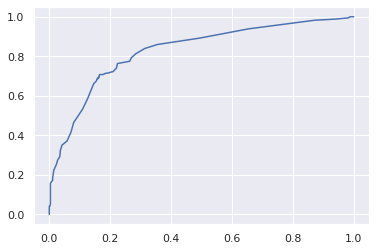

In [92]:
plt.plot(df_roc['TFP'], df_roc['TVP'])

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [96]:
tfp, tvp, thresholds = roc_curve(y3, y_proba3)

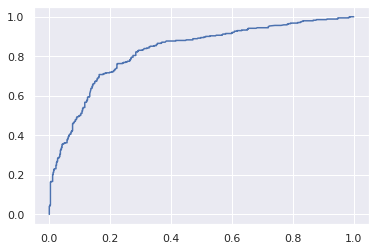

In [100]:
plt.plot(tfp, tvp)

In [102]:
roc_auc_score(y3, y_proba3)

0.8266971314138412

#### Testar como fica a curva ROC quando o modelo prevê que tudo é zero

In [105]:
from sklearn.dummy import DummyClassifier

In [106]:
dummy = DummyClassifier().fit(X3, y3)

In [107]:
dummy.predict(X3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

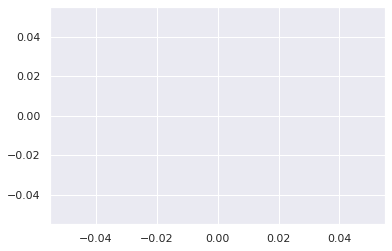

In [104]:
limiares = np.linspace(0, 1, 100)

eixos = []

for limiar in limiares:
  tfp, tvp = calc_tvp_tfp(y3, y_proba3, limiar=limiar)

  eixos.append([tfp, tvp])

df_roc = pd.DataFrame(eixos, columns=['TFP', 'TVP'])
plt.plot(df_roc['TFP'], df_roc['TVP'])


## Problemas **Multiclasse**

#### Glass Dataset

Atributos:

1. **Id number:** 1 to 214
2. **RI:** refractive index
3. **Na:** Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. **Mg:** Magnesium
5. **Al:** Aluminum
6. **Si:** Silicon
7. **K:** Potassium
8. **Ca:** Calcium
9. **Ba:** Barium
10. **Fe:** Iron
11. **Type of glass:**
    - 1: building_windows_float_processed
    - 2: building_windows_non_float_processed
    - 3: vehicle_windows_float_processed
    - 4: vehicle_windows_non_float_processed (none in this database)
    - 5: containers
    - 6: tableware
    - 7: headlamps

Unidade de medida para os atributos 3 ao 10: `weight percent in corresponding oxide`

In [108]:
glass = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/fdf3765d-a4ca-4f60-b2b0-d86bfcbc5c76.csv')

In [109]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [110]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [111]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [112]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


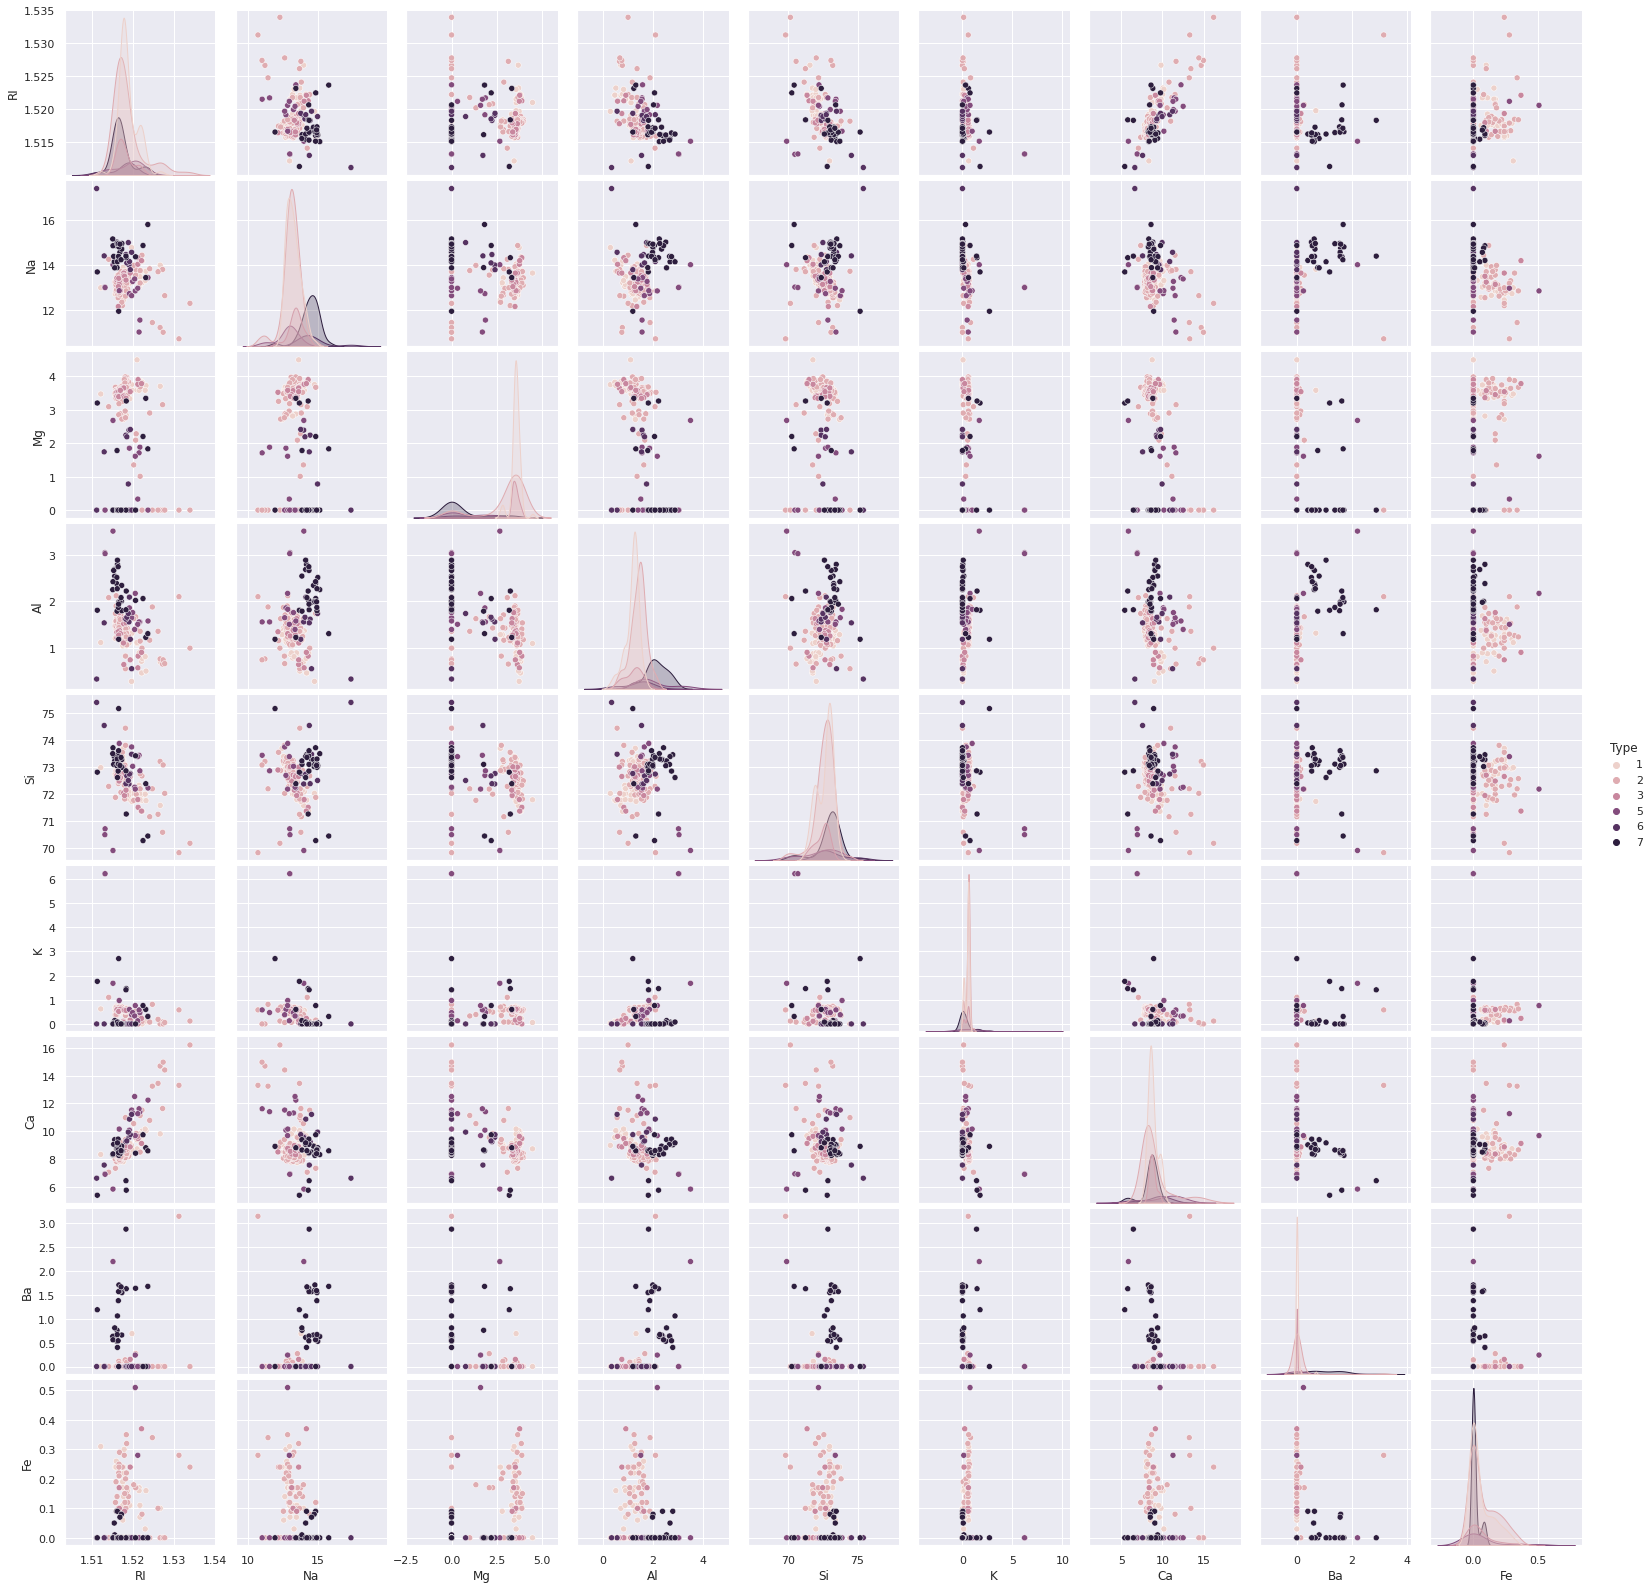

In [113]:
sns.pairplot(glass, hue='Type')

In [114]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7])

#### Criando um modelo de Regressão Logística Multiclasse

In [115]:
X = glass.drop('Type', axis=1)
y = glass['Type']

In [118]:
clf = LogisticRegression(solver="liblinear").fit(X, y)

In [120]:
clf.coef_.shape

(6, 9)

In [121]:
y_pred = clf.predict(X)

In [122]:
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 5, 2, 2, 6, 6,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 7, 2, 2, 2, 2, 5, 5, 2, 5, 5, 2, 2, 2,
       2, 2, 2, 2, 7, 6, 7, 6, 6, 7, 7, 1, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [123]:
y_proba = clf.predict_proba(X)

Para datasets pequenos, o ideal é utilizar o `solver='liblinear'`. Outra alternativa seria aumentar o número de iterações (`max_iter`). Em alguns casos, será necessário combinar as duas alternativas para que o modelo possa convergir e, dessa forma, obter os coeficientes corretos da regressão logística.

In [124]:
y_proba

array([[0.51504803, 0.28430678, 0.17850547, 0.00178699, 0.01743892,
        0.00291381],
       [0.41823704, 0.3592441 , 0.14633837, 0.00882593, 0.03447012,
        0.03288444],
       [0.36452413, 0.44143184, 0.11843733, 0.01350263, 0.02390335,
        0.03820071],
       ...,
       [0.00109285, 0.03828671, 0.0035846 , 0.02805058, 0.02348609,
        0.90549916],
       [0.00129323, 0.0373762 , 0.00372381, 0.02620913, 0.0268499 ,
        0.90454773],
       [0.00106304, 0.04500223, 0.00342248, 0.03406843, 0.01887512,
        0.89756869]])

**Para pensar:** É possível obter uma matriz de confusão para problemas multiclasse? E as métricas que extraímos a partir da matriz de confusão? E o ROC AUC/Gini?

In [125]:
confusion_matrix(y, y_pred)

array([[53, 17,  0,  0,  0,  0],
       [21, 52,  0,  1,  2,  0],
       [12,  5,  0,  0,  0,  0],
       [ 0,  8,  0,  4,  0,  1],
       [ 0,  4,  0,  0,  3,  2],
       [ 1,  1,  0,  1,  0, 26]])

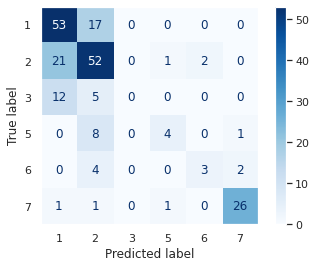

In [127]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3, 5, 6, 7])

cm_display.plot(cmap='Blues')
plt.grid(False)

In [128]:
accuracy_score(y, y_pred)

0.6448598130841121

In [130]:
precision_score(y, y_pred, average="weighted")

/home/walisson/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5987646363734022

In [132]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.76      0.68        70
           2       0.60      0.68      0.64        76
           3       0.00      0.00      0.00        17
           5       0.67      0.31      0.42        13
           6       0.60      0.33      0.43         9
           7       0.90      0.90      0.90        29

    accuracy                           0.64       214
   macro avg       0.56      0.50      0.51       214
weighted avg       0.60      0.64      0.61       214



/home/walisson/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/walisson/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/walisson/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Para aprofundar sobre cálculos de métricas para problemas multiclasse

> https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd#:~:text=ROC%20AUC%20score%20for%20multiclass,to%20distinguish%20between%20each%20class.

#### **Para Praticar**

Aplique a regressão logística ao conjunto de dados acima, e procure classificar, com base nas especificações do vidro, qual seria o tipo do vidro com aquelas especificações.

Em seguida, aplique a métrica da acurácia para avaliar o seu modelo.

### Exercícios

1. Carregue o dataset da iris (do Seaborn, se preferir) e utilize o `petal_length` e `sepal_length` para criar um modelo que classifique essa flor de acordo com as suas três espécies (`setosa`, `versicolor` e `virginica`). Em seguida, calcule as métricas que vimos e plote a região de decisão.

    Em seguida, divida também em dados de treino e teste (utilizando o `train_test_split`) para validar o modelo com dados que não foram utilizados durante o treino. Calcule as métricas, novamente, para treino e teste.
    
2. Faça o mesmo que foi solicitado na questão anterior; dessa vez, utilize o dataset do `breast_cancer`.
    > Dica: Importe o `load_breast_cancer` do submódulo `datasets` do `sklearn`.